# Objective : Iris Flowers Clustering

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Clustering (Using the ML)


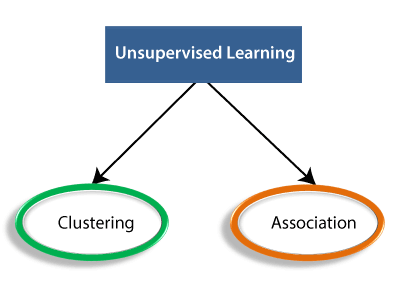

# 1. Load Python Modules

In [1]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

# 2. Read the Dataset from CSV file  - Using Pandas

In [2]:
file_path=r"iris_dataset.csv"
iris_df=pd.read_csv(file_path)
ref_output = iris_df["target"]
iris_df.drop(["target","target_names"],axis=1,inplace=True)

In [3]:
#rename the columns names
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 3. Basic Inspection on given dataset


In [4]:
def basic_inspection_dataset(table):
    print("Top 5 Records of dataset")
    print(table.head())
    print()
        
    print("Bottom Records of dataset")
    print(table.tail())
    print()
    
    print("Column/features/Variable  - Names of Given dataset")
    print(table.columns)
    print()
    
    print("Shape(rows x columns) - of Given dataset")
    print(table.shape)
    print()
    
    print("Data types - Given Column Names")
    print(table.dtypes)
    print()
    
    print("Summry of dataset")
    print(table.info())
    print()
    
    print("To see the count of null/nan values in columns of dataset")
    print(table.isnull().value_counts())
    print()
    
    print("Dataset Summary ")
    print(table.describe())
    print()
    
basic_inspection_dataset(iris_df)

Top 5 Records of dataset
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Bottom Records of dataset
     sepal_length  sepal_width  petal_length  petal_width
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

Column/features/Variable  - Names of Given dataset
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

Shape(rows x columns) - of Given dataset
(150, 4)

Data types - Given Column Names
sepal_length    float64
sepal_width     fl

# 4. Handling Missing Values - Cat - Variables

In [5]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

# 5. Categorical- UniVariable - Analysis -Using Pipeline

In [6]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

In [7]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(iris_df)

# 6. Handling Missing Values in Numerical Columns

In [8]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [9]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 7. Numerical - UniVariable - Analysis - Using -Pipeline

In [10]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
           
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var],  color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()       
        

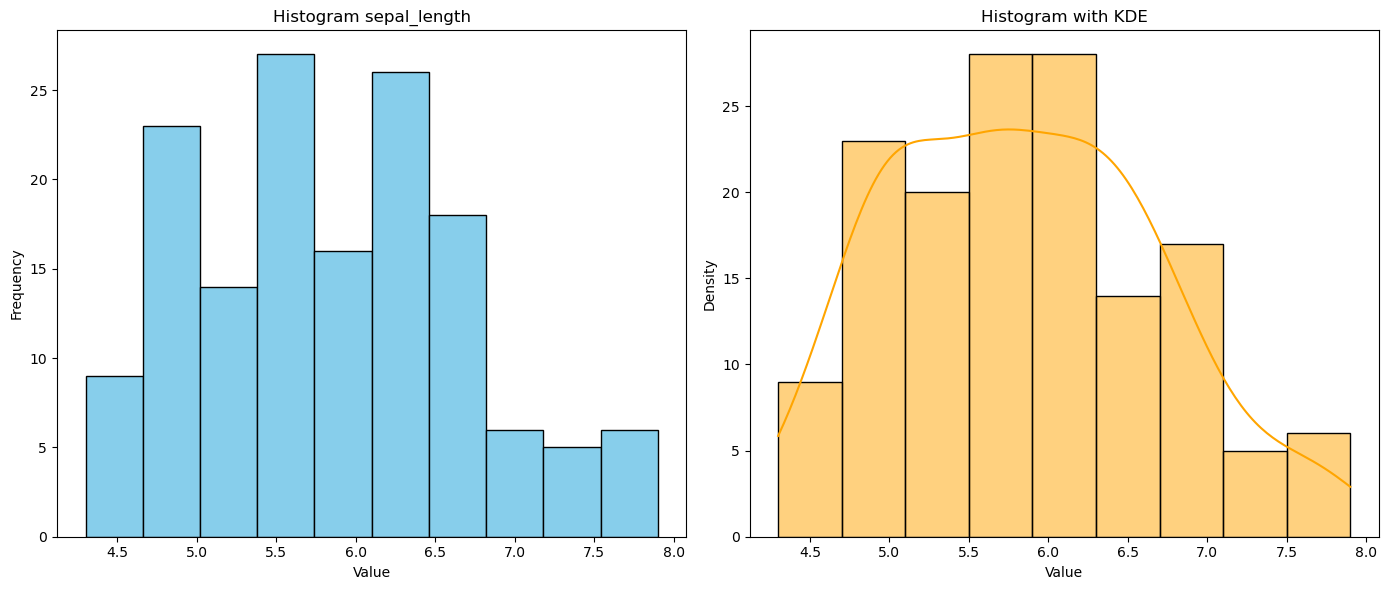

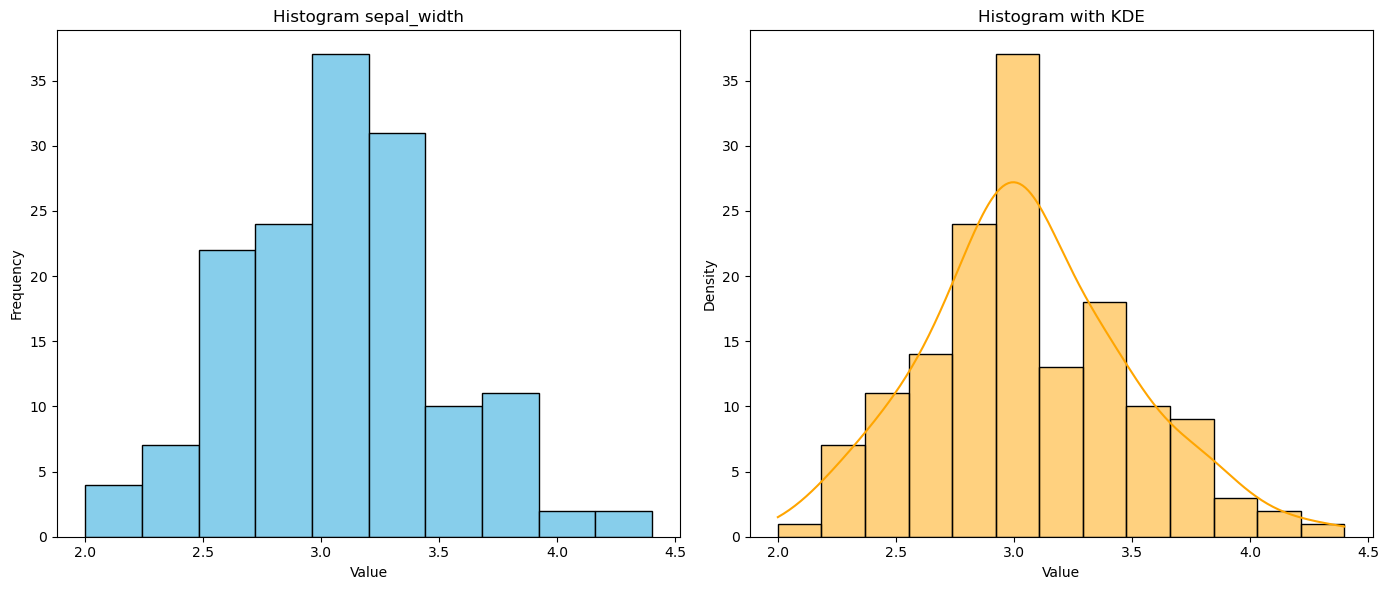

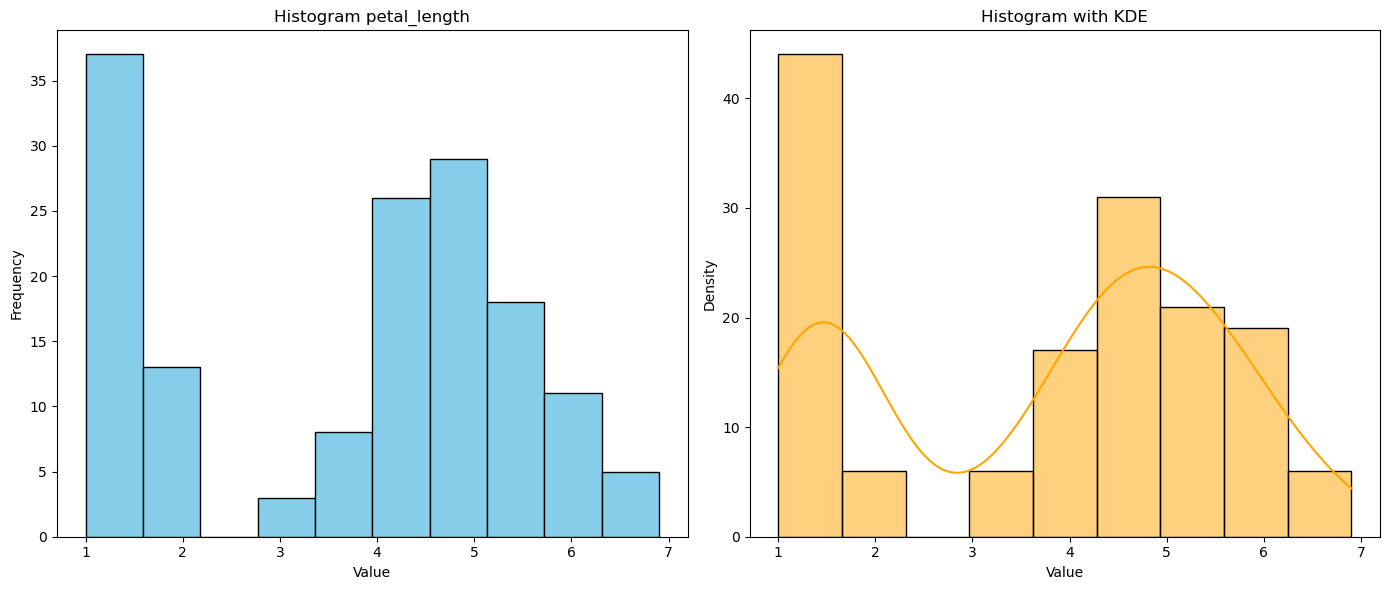

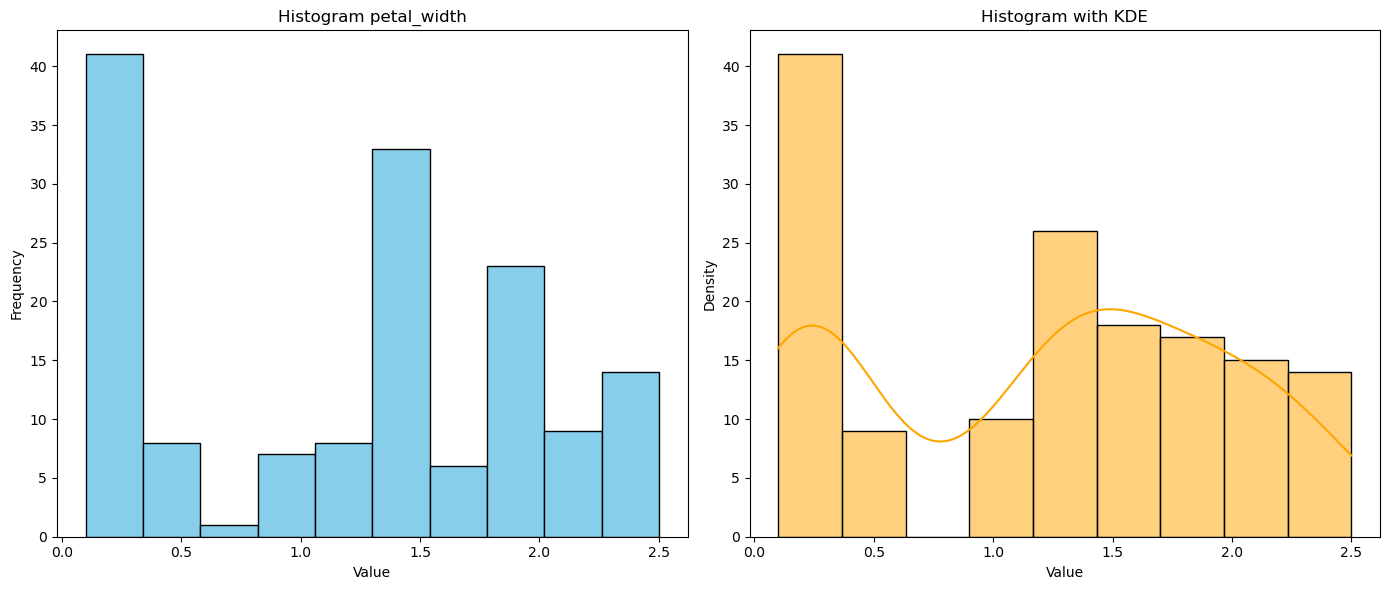

In [11]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

iris_num_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(iris_num_df)

# 8. Numerical - Variables -Outliers Analysis

# 9. Bi Variate Analysis

## 9.2 Num Vs Num

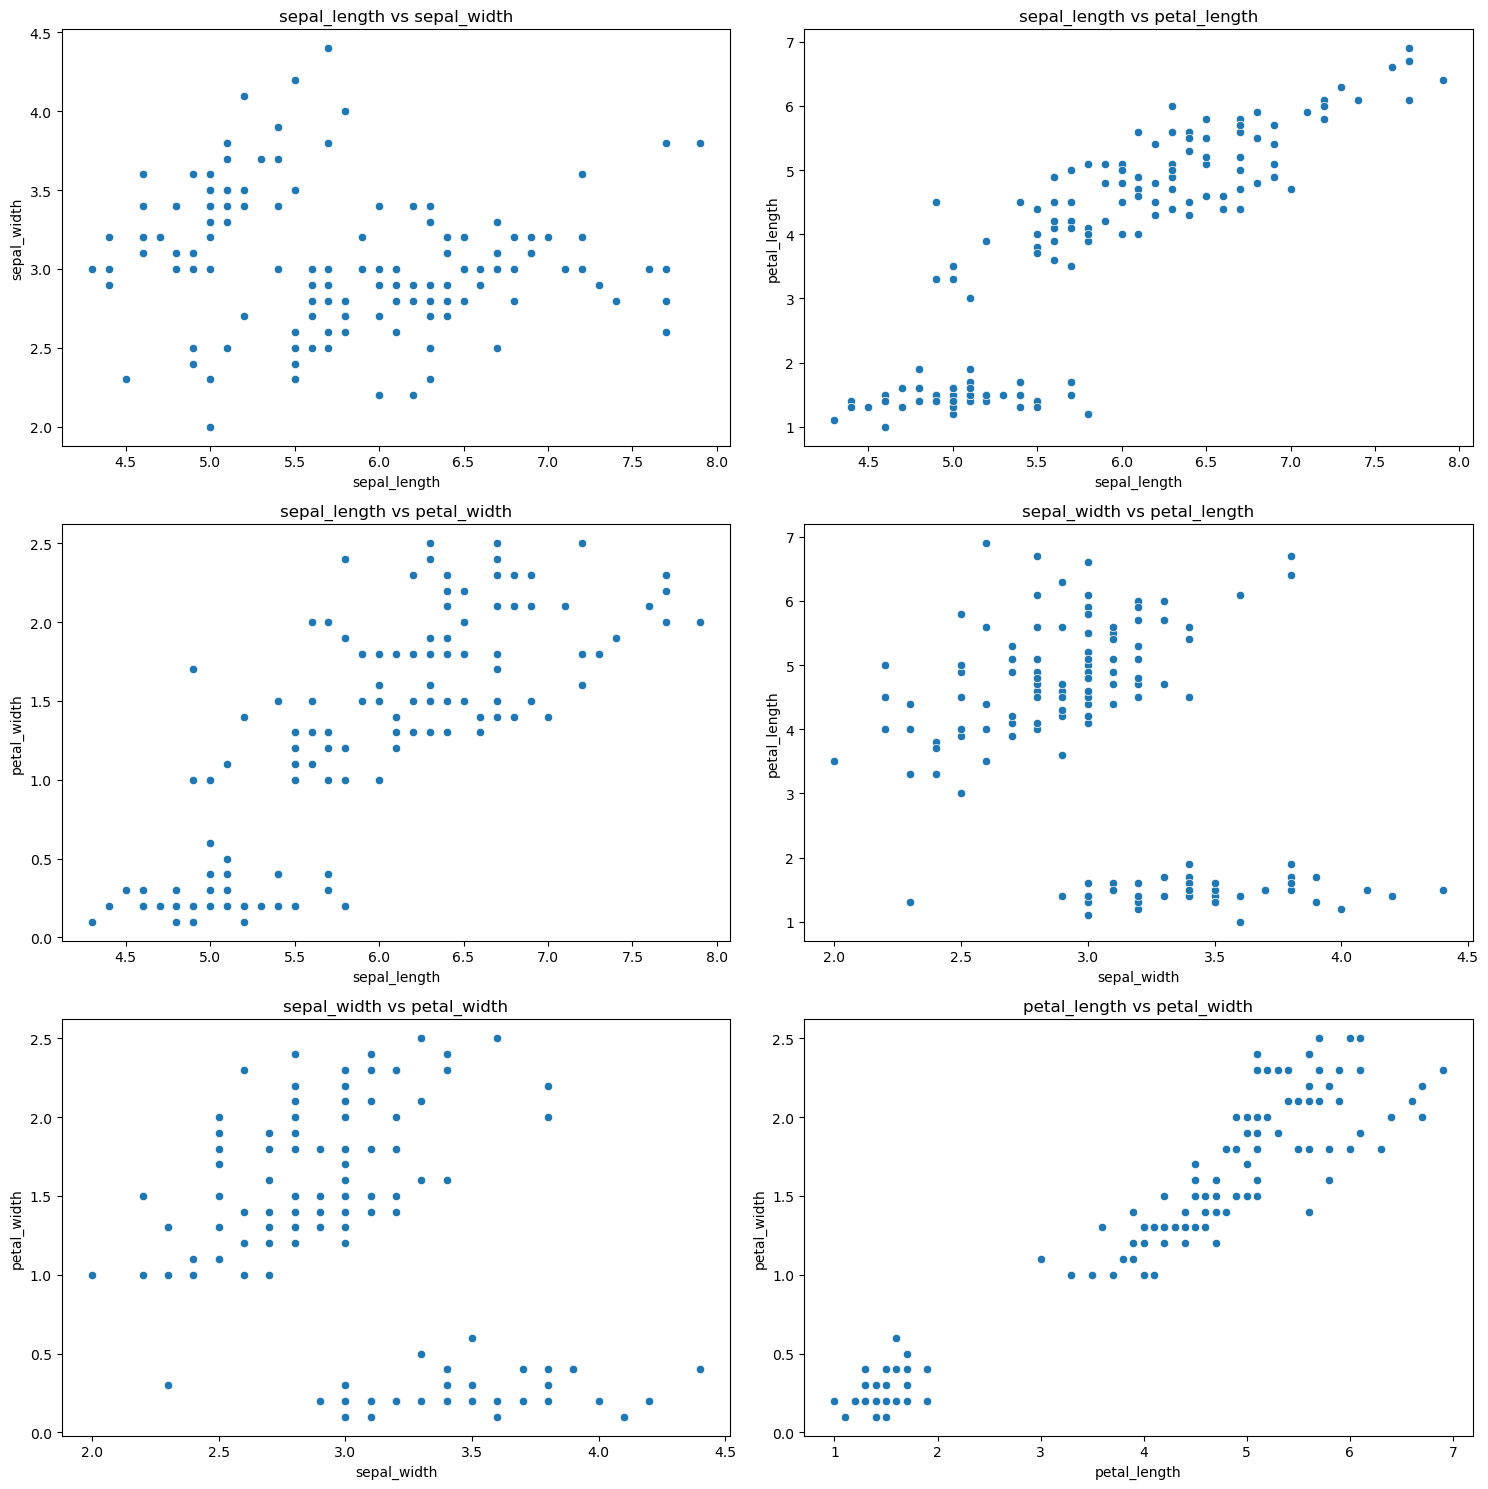

In [12]:
# Selecting only numerical columns
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Creating unique scatter plots
num_cols_count = len(numerical_columns)
num_plots = num_cols_count * (num_cols_count - 1) // 2

# Setting up subplots
fig, axes = plt.subplots(num_plots // 2, 2, figsize=(15, 15))

plot_index = 0
for i in range(num_cols_count):
    for j in range(i+1, num_cols_count):
        row = plot_index // 2
        col = plot_index % 2

        # Scatter plot
        sns.scatterplot(x=numerical_columns[i], y=numerical_columns[j], data=iris_df, ax=axes[row, col])
        axes[row, col].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')

        plot_index += 1

plt.tight_layout()
plt.show()

## 9.3 Correaltion Numerical Columns

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


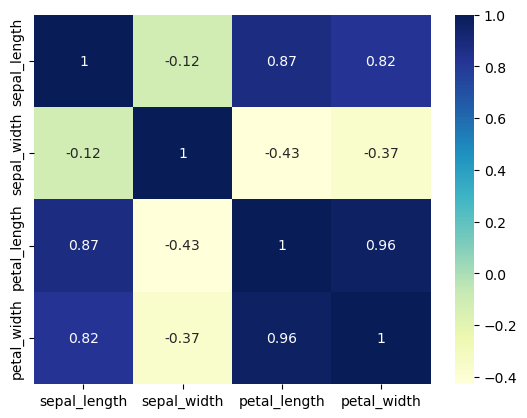

In [13]:
print(iris_df.corr(numeric_only=True))
sns.heatmap(iris_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

# 10. Data Transformation

# 11. Standization

In [14]:
scaler = StandardScaler()
mean_list = []
std_list = []
for var in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    mean_list.append(iris_df[var].mean())
    std_list.append(iris_df[var].std())
    
print(mean_list)
print(std_list)

# Fit and transform the scaler on the selected columns
scaled_columns = scaler.fit_transform(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Replace the original columns with the scaled columns
iris_df[['sepal_length_stand', 'sepal_width_stand', 'petal_length_stand', 'petal_width_stand']] = scaled_columns

print(iris_df)

[5.843333333333334, 3.0573333333333337, 3.7580000000000005, 1.1993333333333336]
[0.8280661279778629, 0.435866284936698, 1.7652982332594667, 0.7622376689603465]
     sepal_length  sepal_width  petal_length  petal_width  sepal_length_stand  \
0             5.1          3.5           1.4          0.2           -0.900681   
1             4.9          3.0           1.4          0.2           -1.143017   
2             4.7          3.2           1.3          0.2           -1.385353   
3             4.6          3.1           1.5          0.2           -1.506521   
4             5.0          3.6           1.4          0.2           -1.021849   
..            ...          ...           ...          ...                 ...   
145           6.7          3.0           5.2          2.3            1.038005   
146           6.3          2.5           5.0          1.9            0.553333   
147           6.5          3.0           5.2          2.0            0.795669   
148           6.2          3.4

In [15]:
iris_df.drop(['sepal_length', 'sepal_width',],axis='columns',inplace=True)

In [16]:
iris_df = iris_df[["petal_length_stand","petal_width_stand"]].copy()

In [17]:
iris_df

,petal_length_stand,petal_width_stand
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444
...,...,...
145,0.819596,1.448832
146,0.705921,0.922303
147,0.819596,1.053935
148,0.933271,1.448832


# ML Models

C:\Users\91956\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91956\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91956\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91956\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

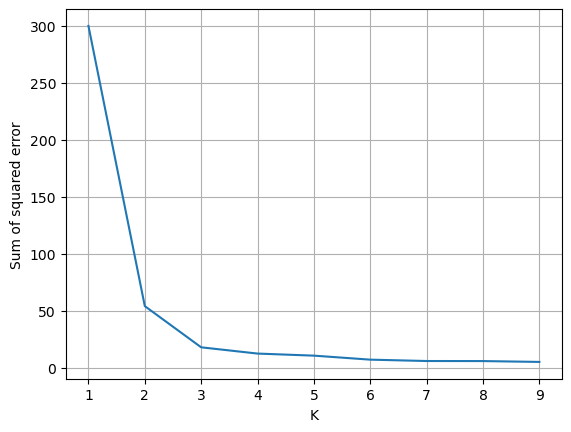

In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_df)
    sse.append(km.inertia_)
 
plt.grid()
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

## Model

In [19]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(iris_df)


C:\Users\91956\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Silhouette Score

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(iris_df,y_predicted)

0.6741313115143868

In [21]:
iris_df['cluster']=y_predicted

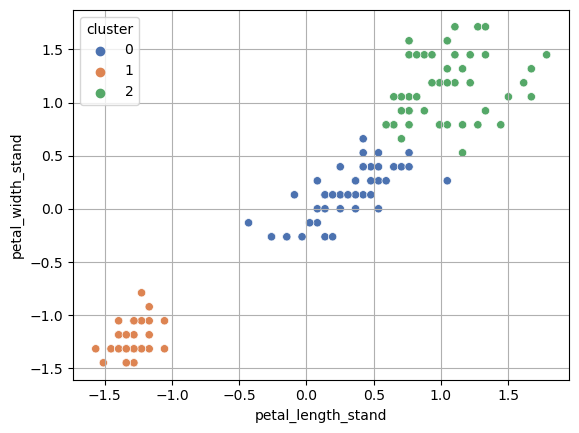

In [22]:
plt.grid()
sns.scatterplot(data=iris_df, x="petal_length_stand",y='petal_width_stand', hue='cluster',palette="deep")
plt.xlabel('petal_length_stand')
plt.ylabel('petal_width_stand')
plt.show()

In [23]:
iris_df["ref_output"]=ref_output

In [24]:
def fun(x):
    if x == 0:
        return 1
    elif x==2:
        return 0
    else:
        return 2
    
iris_df["ref_output"]=iris_df["ref_output"].apply(fun)

In [25]:
iris_df

,petal_length_stand,petal_width_stand,cluster,ref_output
0,-1.340227,-1.315444,1,1
1,-1.340227,-1.315444,1,1
2,-1.397064,-1.315444,1,1
3,-1.283389,-1.315444,1,1
4,-1.340227,-1.315444,1,1
...,...,...,...,...
145,0.819596,1.448832,2,0
146,0.705921,0.922303,2,0
147,0.819596,1.053935,2,0
148,0.933271,1.448832,2,0


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(iris_df["cluster"], iris_df["ref_output"]))


[[ 4  0 48]
 [ 0 50  0]
 [46  0  2]]


# Conclusion
1. We used K=3 - did the K Means Clustering
2. We are getting 6 data points are wrong clustered out of 150